# Jupyter Notebook to automate GSASII routines

#### Importing the library and creating the shortcut (only first time)

In [1]:
# import sys
# sys.path.insert(0, '/users/edgar1993a/work/g2home/')
# import GSASIIscriptable as G2
# G2.installScriptingShortcut()

#### Importing the module using the shortcut

In [2]:
import G2script as G2
from GSASIIplot import PlotPatterns, PlotPowderLines
import matplotlib.pyplot as plt
import numpy as np

setting up GSASIIscriptable from /users/edgar1993a/work/g2home
GSAS-II binary directory: /users/edgar1993a/work/g2home/bindist
7 values read from config file /users/edgar1993a/work/g2home/config.py


#### Create new project (.gpx)

In [3]:
PROJECT = 'gsas_script.gpx'

In [4]:
gpx = G2.G2Project(newgpx=PROJECT)
gpx.save()

gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_script.gpx


#### Add Phases from .cif files

In [5]:
CIF_ZnO = 'ZnO.cif'
CIF_Al2O3 = 'Al2O3.cif'
CIF_CaF2 = 'CaF2.cif'

In [6]:
phase_zno = gpx.add_phase(
    phasefile=CIF_ZnO,
    phasename=CIF_ZnO,
)

phase_al2o3 = gpx.add_phase(
    phasefile=CIF_Al2O3,
    phasename=CIF_Al2O3,
)

phase_caf2 = gpx.add_phase(
    phasefile=CIF_CaF2,
    phasename=CIF_CaF2,
)

/home/edgar1993a/work/pyobjcryst/ZnO.cif read by Reader CIF
gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_script.gpx
/home/edgar1993a/work/pyobjcryst/Al2O3.cif read by Reader CIF
gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_script.gpx
/home/edgar1993a/work/pyobjcryst/CaF2.cif read by Reader CIF
gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_script.gpx


In [7]:
print("*** Phases ***")
for ph in gpx.phases():
    print(f'Phase : {ph.name}, composition: {ph.composition}, density: {ph.density:.2f}')

*** Phases ***
Phase : ZnO.cif, composition: {'Zn': 2.0, 'O': 2.0}, density: 5.68
Phase : Al2O3.cif, composition: {'Al': 12.0, 'O': 18.0}, density: 3.98
Phase : CaF2.cif, composition: {'Ca': 4.0, 'F': 8.0}, density: 3.18


In [8]:
for atom in phase_al2o3.atoms():
    print(f'The atom {atom.element} has cx {atom.cx}, cs {atom.cs}, ct {atom.ct}, cia {atom.cia}, coordinates {atom.coordinates}')

The atom Al has cx 3, cs 7, ct 1, cia 9, coordinates (0.0, 0.0, 0.35216)
The atom O has cx 3, cs 7, ct 1, cia 9, coordinates (0.30668, 0.0, 0.25)


#### Simulate Powder Diffraction with the CIF phases

In [9]:
hist_zno = gpx.add_simulated_powder_histogram(
    histname='hist_zno', iparams='cuka.instprm', Tmin=20, Tmax=100, # wavelength=0.154,
    phases=[
        phase_zno,
    ],
)
hist_caf2 = gpx.add_simulated_powder_histogram(
    histname='hist_caf2', iparams='cuka.instprm', Tmin=20, Tmax=100, # wavelength=0.154,
    phases=[
        phase_caf2,
    ],
)
hist_al2o3 = gpx.add_simulated_powder_histogram(
    histname='hist_al2o3', iparams='cuka.instprm',Tmin=20,Tmax=100, # wavelength=0.154,
    phases=[
        phase_al2o3,
    ],
)
hist_all = gpx.add_simulated_powder_histogram(
    histname='hist_all', iparams='cuka.instprm', Tmin=20, Tmax=100, # wavelength=0.154,
    phases=[
        phase_al2o3,
        phase_zno,
        phase_caf2,
    ],
)

gpx.do_refinements(
    refinements=[{}],
    histogram='all',
    phase='all',
)

Simulating 2500 points from 20 to 100 degrees 2theta
Instrument parameters read: /home/edgar1993a/work/pyobjcryst/cuka.instprm (G2 fmt) bank 1
Simulating 2500 points from 20 to 100 degrees 2theta
Instrument parameters read: /home/edgar1993a/work/pyobjcryst/cuka.instprm (G2 fmt) bank 1
Simulating 2500 points from 20 to 100 degrees 2theta
Instrument parameters read: /home/edgar1993a/work/pyobjcryst/cuka.instprm (G2 fmt) bank 1
Simulating 2500 points from 20 to 100 degrees 2theta
Instrument parameters read: /home/edgar1993a/work/pyobjcryst/cuka.instprm (G2 fmt) bank 1
gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_script.gpx
 Hessian Levenberg-Marquardt SVD refinement on 4 variables:
initial chi^2 3.3852e+05 with 10000 obs.
Read from file:/home/edgar1993a/work/pyobjcryst/gsas_script.bak0.gpx
Save to file  :/home/edgar1993a/work/pyobjcryst/gsas_script.gpx
GPX file save successful
 Refinement results are in file: /home/edgar1993a/work/pyobjcryst/gsas_script.lst
 ***** Refinement su

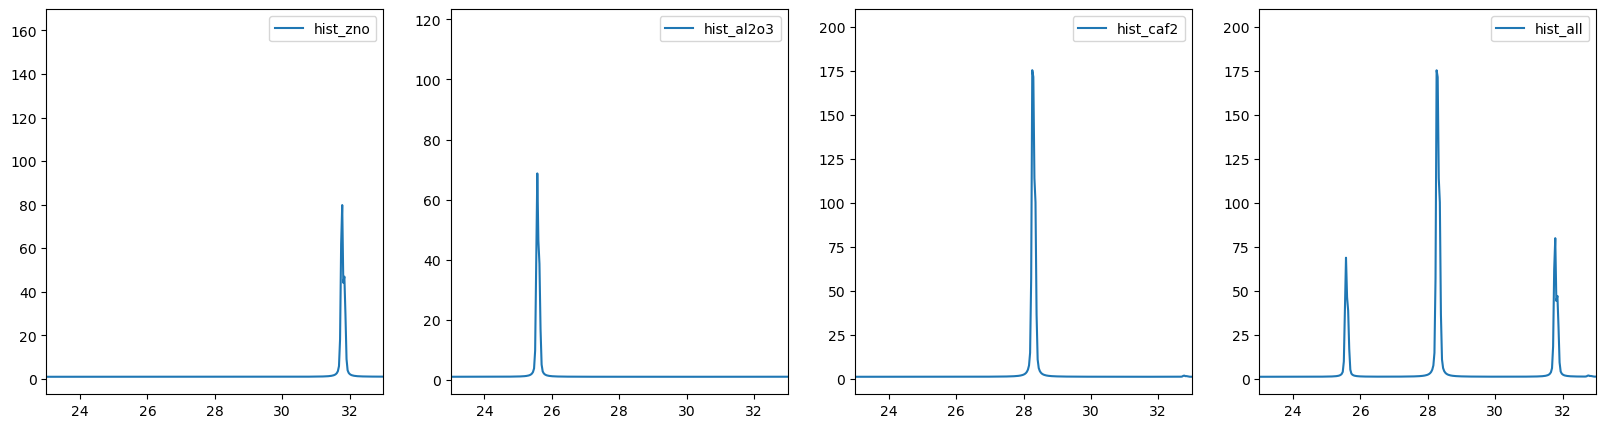

In [10]:
fig, axes = plt.subplots(ncols=4, figsize=(20,5))
HISTS = [hist_zno, hist_al2o3, hist_caf2, hist_all]
LABELS = ['hist_zno', 'hist_al2o3', 'hist_caf2', 'hist_all']
XLIMS = [23,33]
for ind in range(4):
    data = HISTS[ind].data['data'][1]
    axes[ind].plot(data[0], data[3], label=LABELS[ind])
    axes[ind].legend()
    axes[ind].set_xlim(XLIMS)

#### Add Powder Diffraction Data

#### Create an histogram with PD data and linked to the imported phases

In [11]:
pwd = gpx.add_powder_histogram(
    datafile='cpd-1h.prn', 
    iparams='cuka.instprm',
    phases=gpx.phases(),
)

/home/edgar1993a/work/pyobjcryst/cpd-1h.prn
Skipping header line     5.000       158

Skipping header line     5.020       174

Skipping header line     5.040       174

GSAS powder data scan error: no BANK records
/home/edgar1993a/work/pyobjcryst/cpd-1h.prn read by Reader Topas xye or 2th Fit2D chi
Instrument parameters read: /home/edgar1993a/work/pyobjcryst/cuka.instprm (G2 fmt) bank None


1:3: Trying to find one of END, data_heading
>     5.000       158
>     ^
1:3: Trying to find one of END, data_heading
>     5.000       158
>     ^


#### Perform a simple refinement

In [12]:
gpx.do_refinements()

gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_script.gpx
 Hessian Levenberg-Marquardt SVD refinement on 5 variables:
initial chi^2 1.14e+06 with 17251 obs.
Read from file:/home/edgar1993a/work/pyobjcryst/gsas_script.bak0.gpx
Save to file  :/home/edgar1993a/work/pyobjcryst/gsas_script.gpx
GPX file save successful
 Refinement results are in file: /home/edgar1993a/work/pyobjcryst/gsas_script.lst
 ***** Refinement successful *****


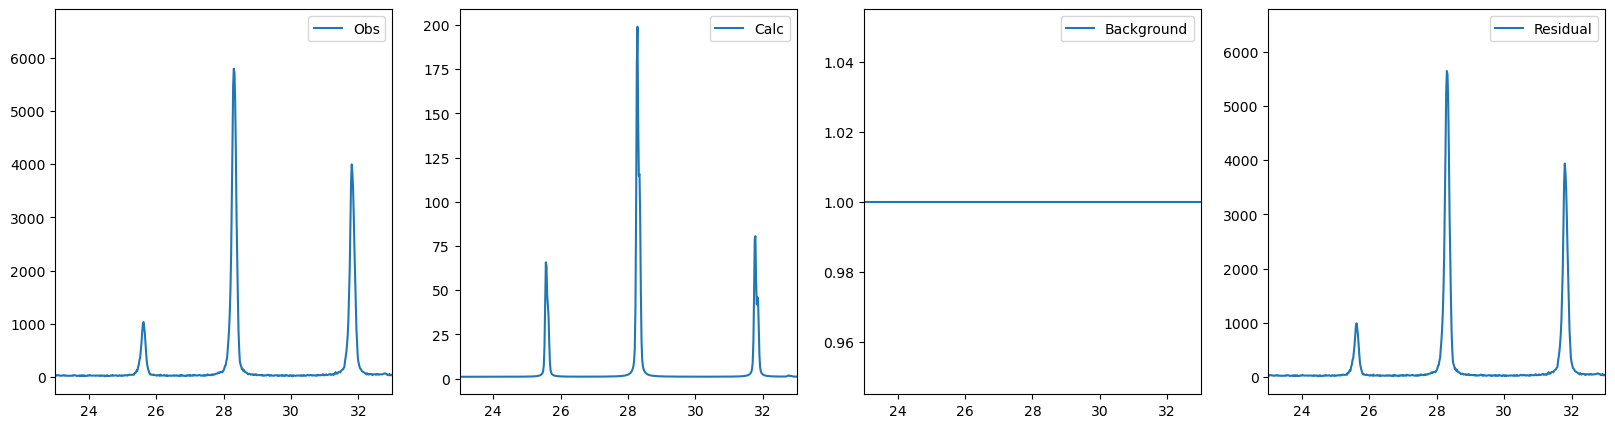

In [13]:
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(20,5))
data = pwd.data['data'][1]
XLIMS = [23,33]
LABELS = ['Obs', 'Calc', 'Background', 'Residual']
DATA_IND = [1,3,4,5]
for num in range(4):
    axes[num].plot(data[0], data[DATA_IND[num]], label=LABELS[num])
    axes[num].legend()
    axes[num].set_xlim(XLIMS)
plt.show()

#### Refine the background

In [14]:
pardict = {
    'set': { 
        'Limits': [23.0, 33.0],
    },
}

In [15]:
gpx.do_refinements([pardict])

gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_script.gpx
 Hessian Levenberg-Marquardt SVD refinement on 5 variables:
initial chi^2 1.1764e+05 with 1757 obs.
Read from file:/home/edgar1993a/work/pyobjcryst/gsas_script.bak0.gpx
Save to file  :/home/edgar1993a/work/pyobjcryst/gsas_script.gpx
GPX file save successful
 Refinement results are in file: /home/edgar1993a/work/pyobjcryst/gsas_script.lst
 ***** Refinement successful *****


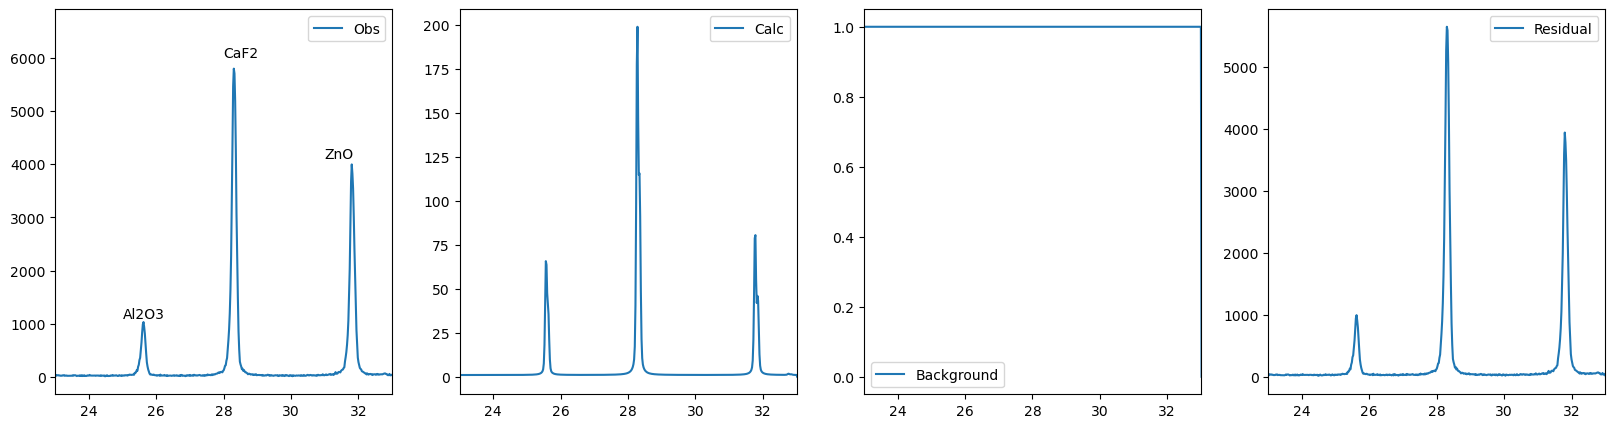

In [16]:
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(20,5))
data = pwd.data['data'][1]
XLIMS = [23,33]
LABELS = ['Obs', 'Calc', 'Background', 'Residual']
DATA_IND = [1,3,4,5]

for num in range(4):
    axes[num].plot(data[0], data[DATA_IND[num]], label=LABELS[num])
    axes[num].legend()
    axes[num].set_xlim(XLIMS)

NOTES = ['Al2O3', 'CaF2', 'ZnO']
NOTES_XY = [(25,1100), (28, 6000), (31, 4100)]

for _ in range(3):
    axes[0].annotate(NOTES[_], NOTES_XY[_])
                       
    
plt.show()

In [17]:
for k in gpx.data.keys():
    print(k)

Constraints
Controls
Covariance
Notebook
Restraints
Rigid bodies
Phases
PWDR hist_zno
PWDR hist_caf2
PWDR hist_al2o3
PWDR hist_all
PWDR cpd-1h.prn


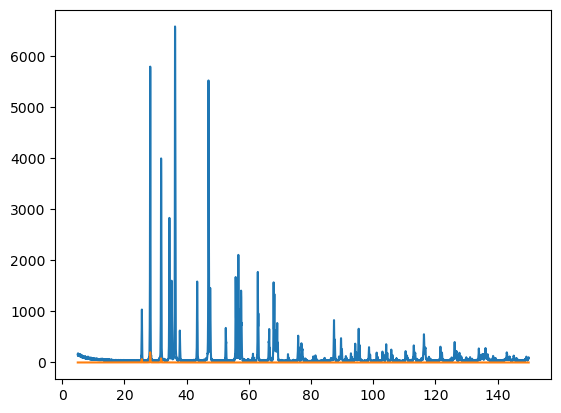

In [18]:
pwd.plot(Yobs=True, Ycalc=True, Background=False, Residual=False)

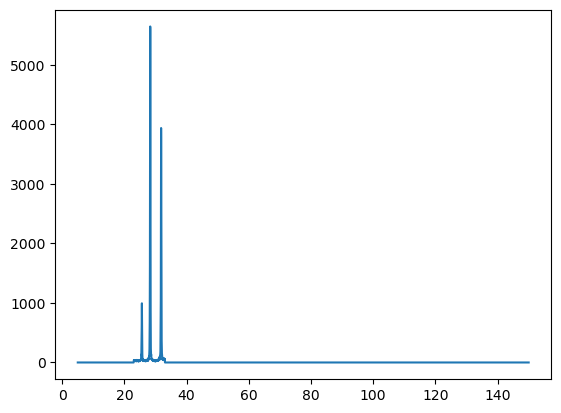

In [19]:
pwd.plot(Yobs=False, Ycalc=False, Background=False, Residual=True)

#### Add background

In [20]:
pardict = {
    'set': { 
        'Limits': [10.0, 20.0],
        'Sample Parameters': ['Absorption', 'Contrast', 'DisplaceX'],
        'Background': {
            'type': 'chebyschev-1', 
            'refine': True,
        },
    },
    'phases' : [
        phase_al2o3,
        phase_caf2,
        phase_zno,
    ]
}

In [21]:
gpx.do_refinements([pardict])

gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_script.gpx
 Hessian Levenberg-Marquardt SVD refinement on 20 variables:

ouch #0 unable to evaluate initial objective function
Check for an invalid parameter value
Use Calculate/"View LS parms" to list all parameter values

Error message: index 4 is out of bounds for axis 0 with size 0
 ***** Refinement error *****


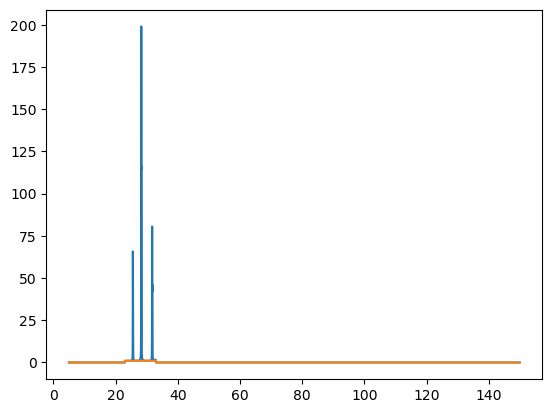

In [22]:
pwd.plot(Yobs=False, Ycalc=True, Background=True, Residual=False)

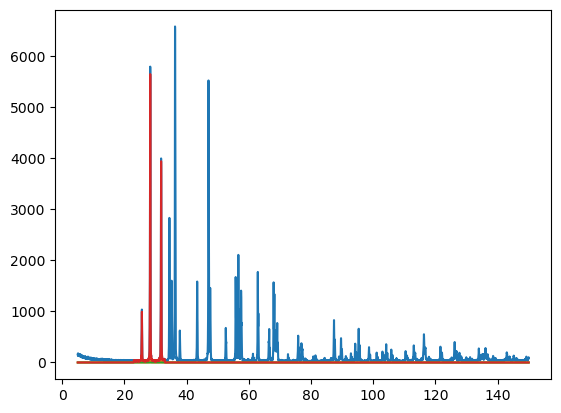

In [23]:
pwd.plot(Yobs=True, Ycalc=True, Background=True, Residual=True)

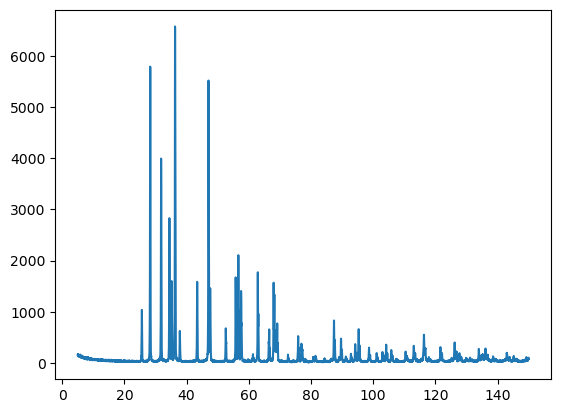

In [24]:
pwd.plot(Yobs=True, Ycalc=False, Background=False, Residual=False)

In [25]:
pwd.data['data'][1][1]

masked_array(data=[158.0, 174.0, 174.0, ..., 102.0, 100.0, 86.0],
             mask=[False, False, False, ..., False, False, False],
       fill_value=1e+20)

In [26]:
G2PwdrData??

Object `G2PwdrData` not found.


#### Pattern simulation with the phases

In [27]:
hist1 = gpx.add_simulated_powder_histogram(
    histname='test',
    phases=gpx.phases(),
)

TypeError: G2Project.add_simulated_powder_histogram() missing 3 required positional arguments: 'iparams', 'Tmin', and 'Tmax'

In [ ]:
gpx.add_simulated_powder_histogram??

#### Phase class

In [ ]:
from G2script import G2Phase, G2AtomRecord, G2PDF, G2Image, G2PwdrData